In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [116]:
!pip install ydata_profiling

In [117]:
!pip install pmdarima

In [118]:
import pmdarima as pm
from pmdarima import auto_arima

In [119]:
from ydata_profiling import ProfileReport

In [262]:
sales = pd.read_csv("sales.csv")
products = pd.read_csv("products.csv")
stores = pd.read_csv("stores.csv")

In [263]:
sales.info()
products.info()
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829262 entries, 0 to 829261
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Sale_ID     829262 non-null  int64 
 1   Date        829262 non-null  object
 2   Store_ID    829262 non-null  int64 
 3   Product_ID  829262 non-null  int64 
 4   Units       829262 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 31.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_ID        35 non-null     int64 
 1   Product_Name      35 non-null     object
 2   Product_Category  35 non-null     object
 3   Product_Cost      35 non-null     object
 4   Product_Price     35 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data col

In [121]:
sales_dataProfiling = ProfileReport(sales, title = "Sales Data Profiling")
sales_dataProfiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [122]:
products_dataProfiling = ProfileReport(products, title = "Products Data Profiling")
products_dataProfiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [123]:
stores_dataProfiling = ProfileReport(stores, title = "Stores Data Profiling")
stores_dataProfiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [124]:
#replacing special characters in cost and price
products['Product_Price'] = products['Product_Price'].str.replace('[\$,]', '', regex=True)
products['Product_Cost'] = products['Product_Cost'].str.replace('[\$,]', '', regex=True)

In [125]:
#changing data types
sales['Date'] = pd.to_datetime(sales['Date'])
products['Product_Cost'] = pd.to_numeric(products['Product_Cost'])
products['Product_Price'] = pd.to_numeric(products['Product_Price'])
stores['Store_Open_Date'] = pd.to_datetime(stores['Store_Open_Date'])

In [126]:
sales.info()
products.info()
stores.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829262 entries, 0 to 829261
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Sale_ID     829262 non-null  int64         
 1   Date        829262 non-null  datetime64[ns]
 2   Store_ID    829262 non-null  int64         
 3   Product_ID  829262 non-null  int64         
 4   Units       829262 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 31.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_ID        35 non-null     int64  
 1   Product_Name      35 non-null     object 
 2   Product_Category  35 non-null     object 
 3   Product_Cost      35 non-null     float64
 4   Product_Price     35 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.5+

In [127]:
#merging datasets
merged_df = pd.merge(pd.merge(sales, products, how = 'left'), stores, how ='left')

In [128]:
#adding new columns
merged_df['Sales'] = merged_df['Units'] * merged_df['Product_Price']
merged_df['Profit'] = merged_df['Sales'] - (merged_df['Units'] * merged_df['Product_Cost'])

In [129]:
merged_df

Sale_ID       Date  Store_ID  Product_ID  Units      Product_Name  \
0             1 2017-01-01        24           4      1  Chutes & Ladders   
1             2 2017-01-01        28           1      1     Action Figure   
2             3 2017-01-01         6           8      1     Deck Of Cards   
3             4 2017-01-01        48           7      1          Dart Gun   
4             5 2017-01-01        44          18      1       Lego Bricks   
...         ...        ...       ...         ...    ...               ...   
829257   829258 2018-09-30        24          19      1        Magic Sand   
829258   829259 2018-09-30        16          35      1     Uno Card Game   
829259   829260 2018-09-30        22          19      1        Magic Sand   
829260   829261 2018-09-30        13           2      2    Animal Figures   
829261   829262 2018-09-30        32           6      1         Colorbuds   

         Product_Category  Product_Cost  Product_Price  \
0                   Games          9.99          12.99   
1                    Toys          9.99          15.99   
2                   Games          3.99           6.99   
3       Sports & Outdoors         11.99          15.99   
4                    Toys         34.99          39.99   
...                   ...           ...            ...   
829257       Art & Crafts         13.99          15.99   
829258              Games          3.99           7.99   
829259       Art & Crafts         13.99          15.99   
829260               Toys          9.99          12.99   
829261        Electronics          6.99          14.99   

                          Store_Name       Store_City Store_Location  \
0        Maven Toys Aguascalientes 1   Aguascalientes       Downtown   
1                Maven Toys Puebla 2           Puebla       Downtown   
2              Maven Toys Mexicali 1         Mexicali     Commercial   
3              Maven Toys Saltillo 2         Saltillo     Commercial   
4                Maven Toys Puebla 3           Puebla    Residential   
...                              ...              ...            ...   
829257   Maven Toys Aguascalientes 1   Aguascalientes       Downtown   
829258  Maven Toys San Luis Potosi 1  San Luis Potosi       Downtown   
829259       Maven Toys Guanajuato 2       Guanajuato     Commercial   
829260         Maven Toys Mexicali 2         Mexicali       Downtown   
829261       Maven Toys Hermosillo 1       Hermosillo    Residential   

       Store_Open_Date  Sales  Profit  
0           2010-07-31  12.99     3.0  
1           2011-04-01  15.99     6.0  
2           2003-12-13   6.99     3.0  
3           2016-03-23  15.99     4.0  
4           2014-12-27  39.99     5.0  
...                ...    ...     ...  
829257      2010-07-31  15.99     2.0  
829258      2007-05-19   7.99     4.0  
829259      2010-03-29  15.99     2.0  
829260      2006-08-30  25.98     6.0  
829261      2012-08-31  14.99     8.0  

[829262 rows x 15 columns]

In [130]:
#Total sales of product based on item
products_grouped = merged_df.groupby('Product_Name')[['Units', 'Sales']].sum().reset_index().sort_values(by = 'Sales', ascending = False)
products_grouped

Product_Name   Units       Sales
17            Lego Bricks   59737  2388882.63
5               Colorbuds  104368  1564476.32
18             Magic Sand   60598   968962.02
0           Action Figure   57958   926748.42
29           Rubik's Cube   45672   912983.28
7           Deck Of Cards   84034   587397.66
30           Splash Balls   60248   541629.52
23               Nerf Gun   26543   530594.57
1          Animal Figures   39089   507766.11
6                Dart Gun   31588   505092.12
16        Kids Makeup Kit   24433   488415.67
9        Dinosaur Figures   29012   434889.88
8                Dino Egg   38236   420213.64
13          Glass Marbles   37518   412322.82
12       Gamer Headphones   17958   376938.42
2         Barrel O' Slime   91663   365735.37
20     Mini Ping Pong Set   33604   335703.96
24            PlayDoh Can  103128   308352.72
33              Toy Robot   11749   305356.51
10          Etch A Sketch   12168   255406.32
25        PlayDoh Playset    6298   157387.02
14      Hot Wheels 5-Pack   22659   135727.41
15                  Jenga   13054   130409.46
26        PlayDoh Toolkit   23128   115408.72
28             Plush Pony    5488   109705.12
31  Supersoaker Water Gun    6793   101827.07
11     Foam Disk Launcher    7620    91363.80
22         Mr. Potatohead    8605    85963.95
32             Teddy Bear    6416    83343.84
21               Monopoly    3385    67666.15
19   Mini Basketball Hoop    2647    66148.53
3        Chutes & Ladders    3829    49738.71
27               Playfoam    4158    45696.42
4        Classic Dominoes    4471    44665.29
34          Uno Card Game    2710    21652.90

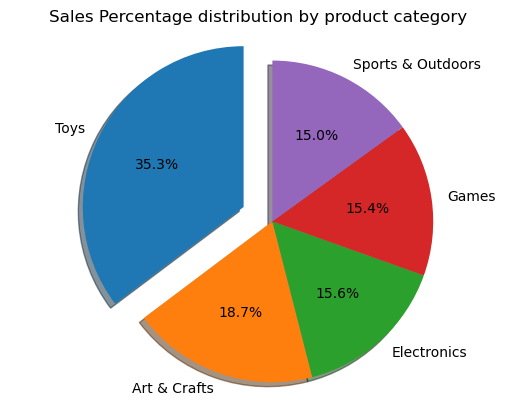

In [131]:
#Sales percentage based on products category
%matplotlib inline
category_grouped= merged_df.groupby('Product_Category')['Sales'].sum().reset_index().sort_values(by = 'Sales', ascending = False)
plt.pie(category_grouped['Sales'], labels = category_grouped['Product_Category'], autopct='%1.1f%%', startangle=90, explode = [0.2,0,0,0,0], shadow = True)
plt.title('Sales Percentage distribution by product category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [132]:
category_grouped

Product_Category       Sales
4               Toys  5093241.00
0       Art & Crafts  2705364.26
1        Electronics  2246771.25
2              Games  2226836.27
3  Sports & Outdoors  2172359.57

In [133]:
category_grouped1= merged_df.groupby('Product_Category')['Profit'].sum().reset_index()
category_grouped1

Product_Category     Profit
0       Art & Crafts   753354.0
1        Electronics  1001437.0
2              Games   673993.0
3  Sports & Outdoors   505718.0
4               Toys  1079527.0

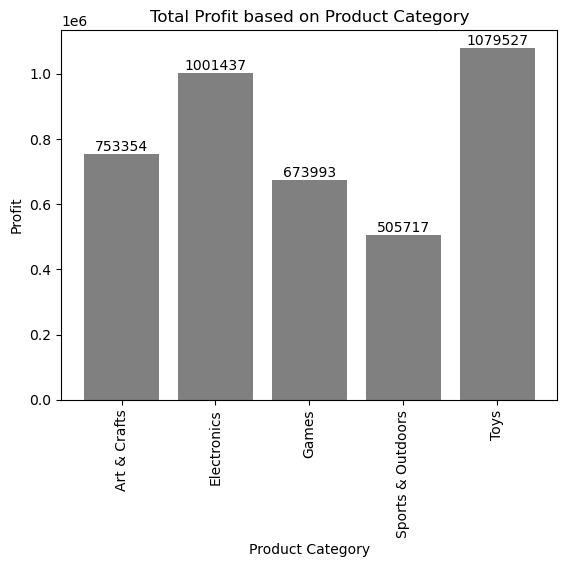

In [134]:
bars = plt.bar(category_grouped1['Product_Category'], category_grouped1['Profit'], color ='grey')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')
plt.xlabel('Product Category')
plt.ylabel('Profit')
plt.title('Total Profit based on Product Category')
plt.xticks(rotation=90)
plt.show()

In [135]:
store_grouped = merged_df.groupby('Store_Name')['Sales'].sum().reset_index()
store_grouped

Store_Name      Sales
0     Maven Toys Aguascalientes 1  239997.35
1           Maven Toys Campeche 1  311786.44
2           Maven Toys Campeche 2  206055.23
3           Maven Toys Chetumal 1  258919.35
4          Maven Toys Chihuahua 1  248008.30
5          Maven Toys Chihuahua 2  268704.74
6       Maven Toys Chilpancingo 1  242539.73
7    Maven Toys Ciudad Victoria 1  294803.99
8   Maven Toys Ciudad de Mexico 1  433556.21
9   Maven Toys Ciudad de Mexico 2  554553.43
10  Maven Toys Ciudad de Mexico 3  337424.66
11  Maven Toys Ciudad de Mexico 4  323957.71
12        Maven Toys Cuernavaca 1  221587.26
13          Maven Toys Culiacan 1  251160.91
14           Maven Toys Durango 1  222318.78
15       Maven Toys Guadalajara 1  261842.89
16       Maven Toys Guadalajara 2  262435.02
17       Maven Toys Guadalajara 3  449354.91
18       Maven Toys Guadalajara 4  348466.64
19        Maven Toys Guanajuato 1  313916.60
20        Maven Toys Guanajuato 2  278926.67
21        Maven Toys Guanajuato 3  276212.56
22        Maven Toys Hermosillo 1  235115.18
23        Maven Toys Hermosillo 2  323427.02
24        Maven Toys Hermosillo 3  344846.64
25            Maven Toys La Paz 1  210897.83
26            Maven Toys Merida 1  232097.72
27          Maven Toys Mexicali 1  294019.42
28          Maven Toys Mexicali 2  292156.43
29         Maven Toys Monterrey 1  277959.14
30         Maven Toys Monterrey 2  372998.82
31         Maven Toys Monterrey 3  285814.24
32         Maven Toys Monterrey 4  325073.50
33           Maven Toys Morelia 1  273060.05
34            Maven Toys Oaxaca 1  242154.36
35           Maven Toys Pachuca 1  237676.15
36            Maven Toys Puebla 1  258533.87
37            Maven Toys Puebla 2  282616.87
38            Maven Toys Puebla 3  267559.55
39          Maven Toys Saltillo 1  330408.90
40          Maven Toys Saltillo 2  249106.07
41   Maven Toys San Luis Potosi 1  263389.65
42          Maven Toys Santiago 1  277598.14
43            Maven Toys Toluca 1  411157.32
44            Maven Toys Toluca 2  222364.36
45  Maven Toys Tuxtla Gutierrez 1  229698.27
46      Maven Toys Villahermosa 1  258210.66
47            Maven Toys Xalapa 1  265812.73
48            Maven Toys Xalapa 2  344307.04
49         Maven Toys Zacatecas 1  229983.04

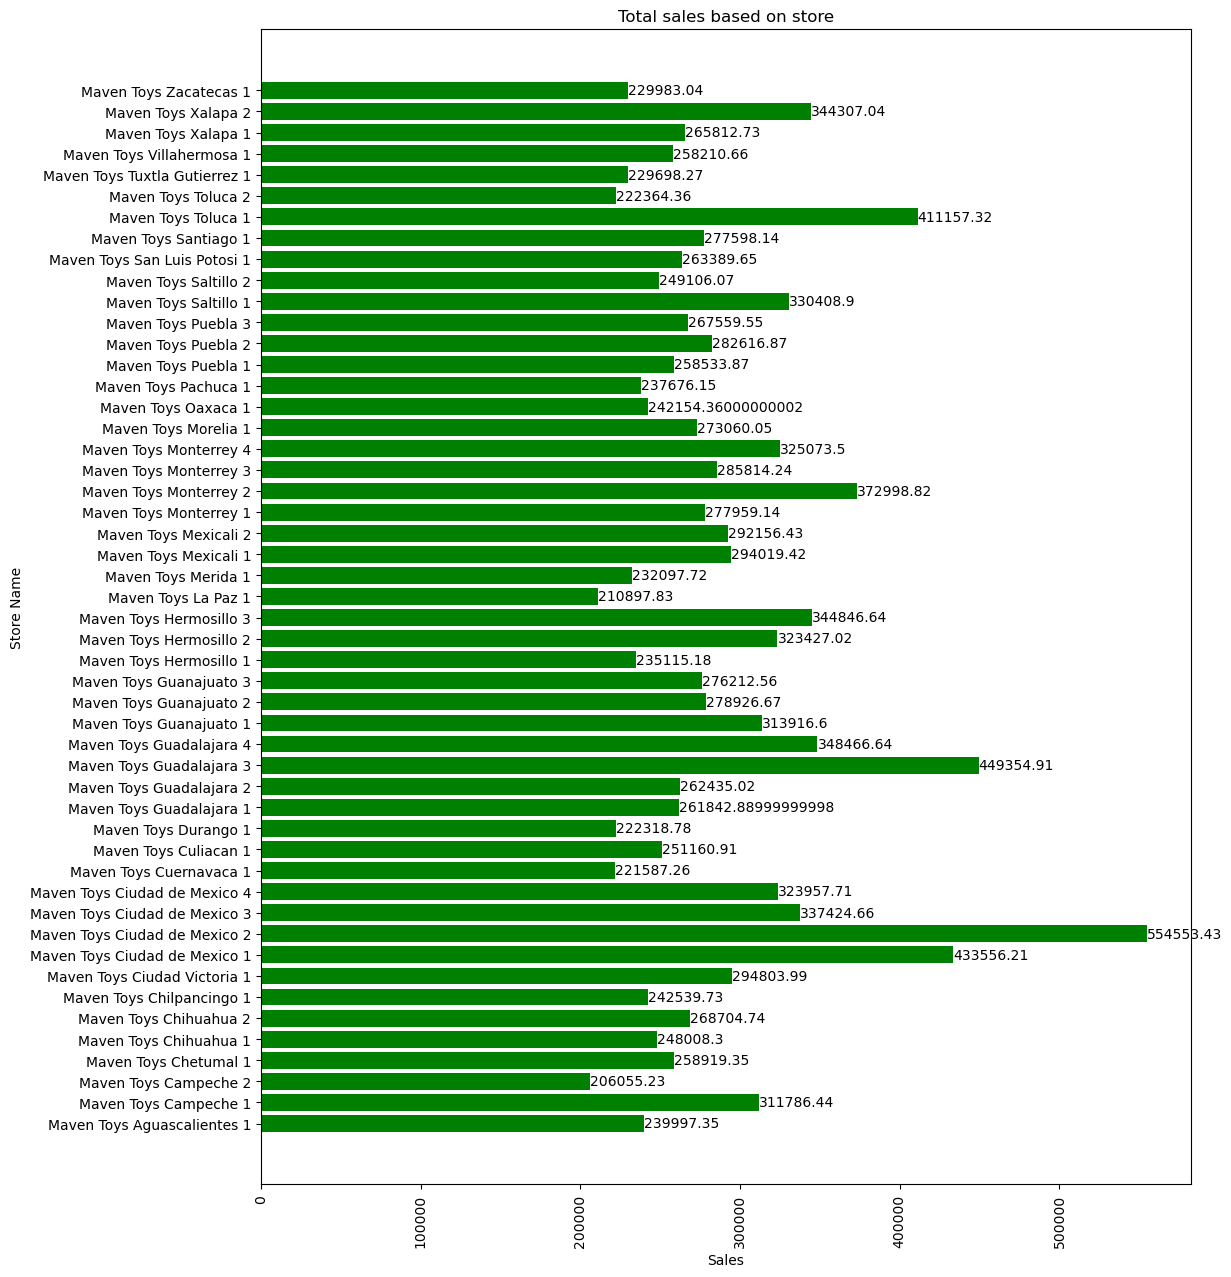

In [136]:
plt.figure(figsize=(12,15))
plt.barh(store_grouped['Store_Name'], store_grouped['Sales'], color ='green')
for index, value in enumerate(store_grouped['Sales']):
    plt.text(value, index, str(value), ha='left', va='center')
plt.xlabel('Sales')
plt.ylabel('Store Name')
plt.title('Total sales based on store')
plt.xticks(rotation=90)
plt.show()

In [137]:
city_grouped = merged_df.groupby(['Store_City', 'Product_Name'])['Units'].sum().reset_index()
city_grouped

Store_City           Product_Name  Units
0    Aguascalientes          Action Figure    751
1    Aguascalientes         Animal Figures    598
2    Aguascalientes        Barrel O' Slime   1584
3    Aguascalientes       Chutes & Ladders     95
4    Aguascalientes       Classic Dominoes    176
..              ...                    ...    ...
967       Zacatecas           Rubik's Cube    841
968       Zacatecas           Splash Balls    659
969       Zacatecas  Supersoaker Water Gun    163
970       Zacatecas             Teddy Bear    192
971       Zacatecas              Toy Robot    160

[972 rows x 3 columns]

In [138]:
idx = city_grouped.groupby('Store_City')['Units'].idxmax()

# Select the rows corresponding to the maximum units for each city
highest_units_per_city = city_grouped.loc[idx].reset_index(drop=True)

# Display the highest unit selling product for each city
print("\nHighest Unit Selling Product for Each City:")
print(highest_units_per_city)


Highest Unit Selling Product for Each City:
          Store_City        Product_Name  Units
0     Aguascalientes           Colorbuds   2096
1           Campeche  Mini Ping Pong Set   5112
2           Chetumal           Colorbuds   1922
3          Chihuahua  Mini Ping Pong Set   6284
4       Chilpancingo           Colorbuds   2077
5    Ciudad Victoria           Colorbuds   3439
6         Cuernavaca         PlayDoh Can   2000
7   Cuidad de Mexico     Barrel O' Slime  11968
8           Culiacan         PlayDoh Can   2820
9            Durango         PlayDoh Can   2123
10       Guadalajara           Colorbuds  10673
11        Guanajuato         PlayDoh Can   7664
12        Hermosillo           Colorbuds   9904
13            La Paz       Deck Of Cards   2104
14            Merida         PlayDoh Can   2337
15          Mexicali           Colorbuds   6591
16         Monterrey           Colorbuds   9227
17           Morelia       Glass Marbles   5120
18            Oaxaca     Barrel O' Slime   

In [255]:
#create a new data frame with Date and Profit by grouping with month
new_df1 = merged_df[['Date', 'Sales']].copy()
new_df1['Year'] = new_df1['Date'].dt.year
new_df1['Month'] = new_df1['Date'].dt.month
new_df1 = new_df1.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
new_df1['Year_Month'] = new_df1['Year'].astype(str) + '-' + new_df1['Month'].astype(str)
new_df1.drop(['Year', 'Month'], axis=1, inplace=True)
new_df1 = new_df1[['Year_Month', 'Sales']]
new_df1

Year_Month      Sales
0      2017-1  542554.91
1      2017-2  541351.65
2      2017-3  589485.19
3      2017-4  681072.98
4      2017-5  672369.90
5      2017-6  661980.22
6      2017-7  556034.23
7      2017-8  489422.73
8      2017-9  585844.04
9     2017-10  623874.39
10    2017-11  661304.15
11    2017-12  877203.69
12     2018-1  747196.22
13     2018-2  722632.19
14     2018-3  883515.64
15     2018-4  827691.07
16     2018-5  825319.49
17     2018-6  808299.25
18     2018-7  828348.86
19     2018-8  660877.07
20     2018-9  658194.48

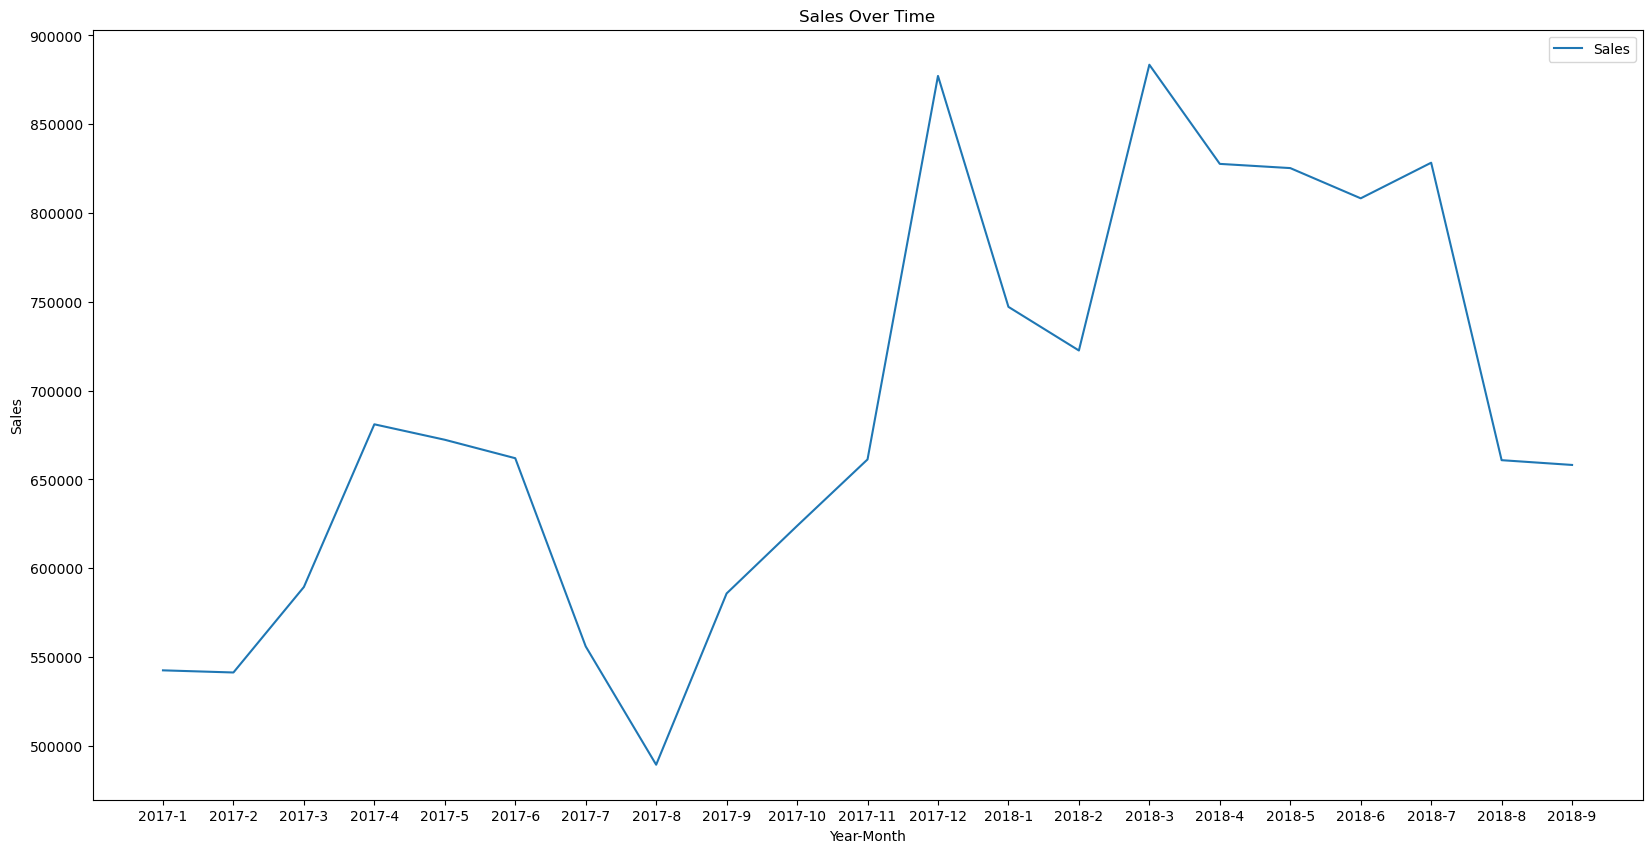

In [259]:
#plot the actual time series data
plt.figure(figsize=(20, 10))
plt.plot(new_df1['Year_Month'], new_df1['Sales'], label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.legend()
plt.show()

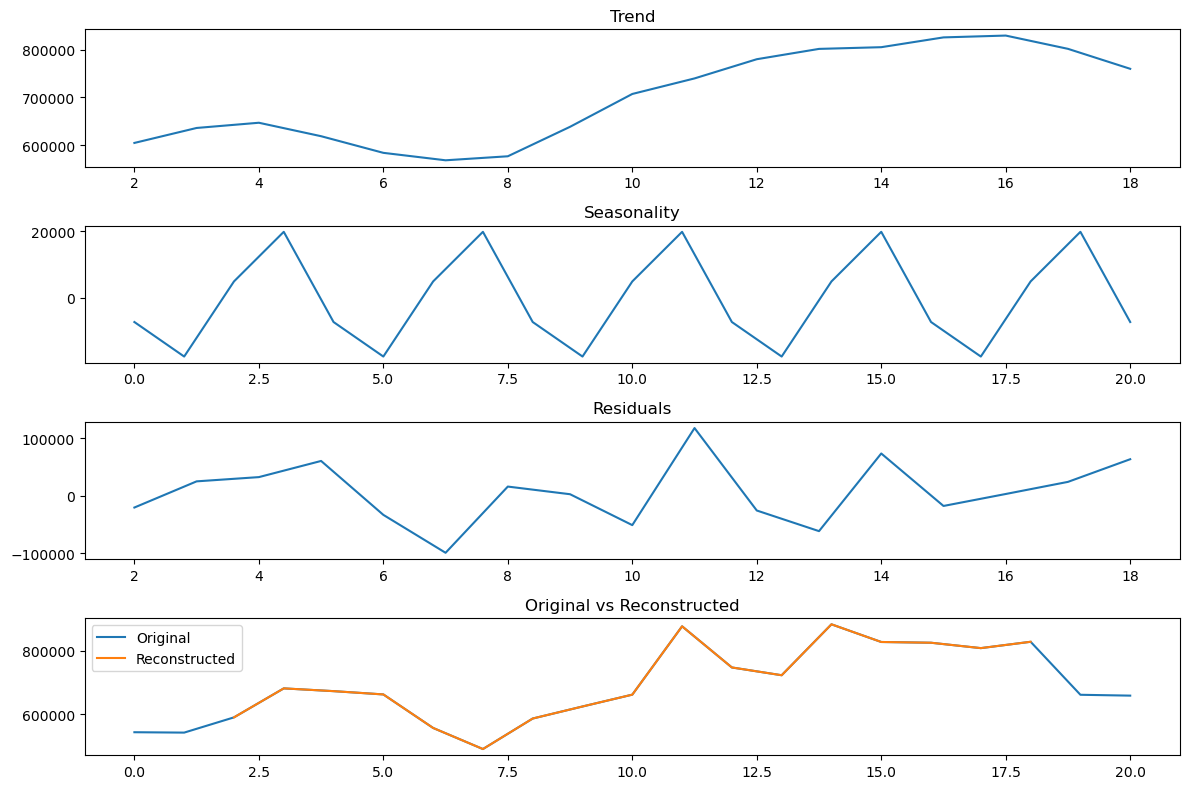

In [261]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose the time series into trend, seasonality, and residual
result = seasonal_decompose(new_df1['Sales'], model='additive', period=4)

# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality')

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residuals')

plt.subplot(4, 1, 4)
plt.plot(new_df1['Sales'], label='Original')
plt.plot(result.trend + result.seasonal + result.resid, label='Reconstructed')
plt.title('Original vs Reconstructed')
plt.legend()

plt.tight_layout()
plt.show()

In [140]:
df = merged_df.groupby(['Date','Product_Category'])['Profit'].sum().reset_index()
df

Date   Product_Category  Profit
0    2017-01-01       Art & Crafts   290.0
1    2017-01-01        Electronics  1461.0
2    2017-01-01              Games  1783.0
3    2017-01-01  Sports & Outdoors  1146.0
4    2017-01-01               Toys  1378.0
...         ...                ...     ...
3185 2018-09-30       Art & Crafts  2820.0
3186 2018-09-30        Electronics   898.0
3187 2018-09-30              Games  1117.0
3188 2018-09-30  Sports & Outdoors  1993.0
3189 2018-09-30               Toys  2002.0

[3190 rows x 3 columns]

In [141]:
df_Art = df[df['Product_Category'] == 'Art & Crafts']
df_Art

Date Product_Category  Profit
0    2017-01-01     Art & Crafts   290.0
5    2017-01-02     Art & Crafts   158.0
10   2017-01-03     Art & Crafts   318.0
15   2017-01-04     Art & Crafts   506.0
20   2017-01-05     Art & Crafts   458.0
...         ...              ...     ...
3165 2018-09-26     Art & Crafts  1613.0
3170 2018-09-27     Art & Crafts  2193.0
3175 2018-09-28     Art & Crafts  2798.0
3180 2018-09-29     Art & Crafts  2554.0
3185 2018-09-30     Art & Crafts  2820.0

[638 rows x 3 columns]

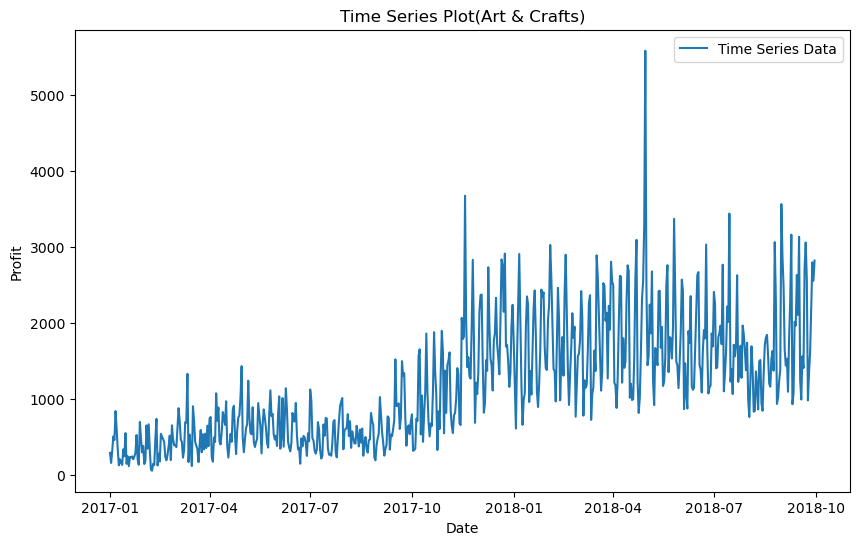

In [142]:
df_Art.set_index('Date', inplace=True)
plt.figure(figsize=(10, 6))
plt.plot(df_Art.index, df_Art['Profit'], label='Time Series Data')
plt.title('Time Series Plot(Art & Crafts)')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.show()

In [143]:
df_Elec = df[df['Product_Category'] == 'Electronics']
df_Elec

Date Product_Category  Profit
1    2017-01-01      Electronics  1461.0
6    2017-01-02      Electronics  3551.0
11   2017-01-03      Electronics  1344.0
16   2017-01-04      Electronics  2105.0
21   2017-01-05      Electronics  2682.0
...         ...              ...     ...
3166 2018-09-26      Electronics   696.0
3171 2018-09-27      Electronics   668.0
3176 2018-09-28      Electronics  1563.0
3181 2018-09-29      Electronics  1363.0
3186 2018-09-30      Electronics   898.0

[638 rows x 3 columns]

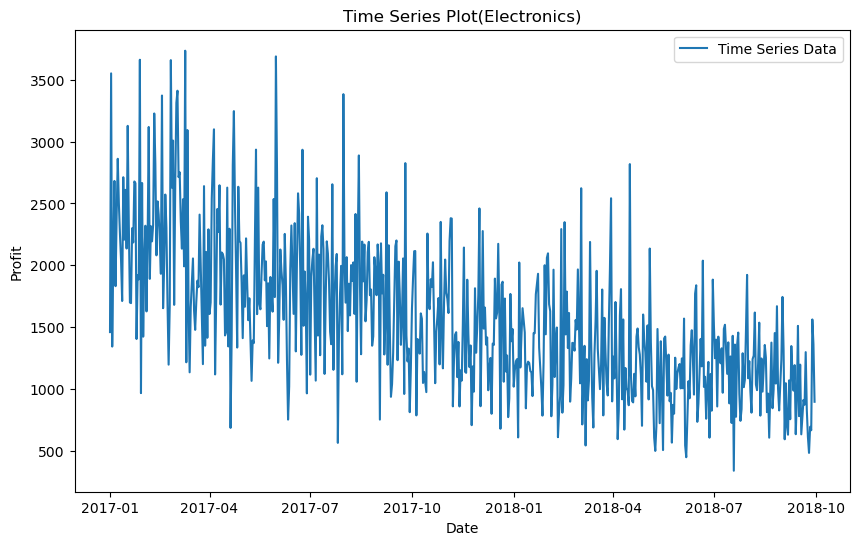

In [144]:
df_Elec.set_index('Date', inplace=True)
plt.figure(figsize=(10, 6))
plt.plot(df_Elec.index, df_Elec['Profit'], label='Time Series Data')
plt.title('Time Series Plot(Electronics)')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.show()

In [145]:
df_Games = df[df['Product_Category'] == 'Games']
df_Games

Date Product_Category  Profit
2    2017-01-01            Games  1783.0
7    2017-01-02            Games   836.0
12   2017-01-03            Games   486.0
17   2017-01-04            Games   464.0
22   2017-01-05            Games   896.0
...         ...              ...     ...
3167 2018-09-26            Games   299.0
3172 2018-09-27            Games   285.0
3177 2018-09-28            Games   485.0
3182 2018-09-29            Games   943.0
3187 2018-09-30            Games  1117.0

[638 rows x 3 columns]

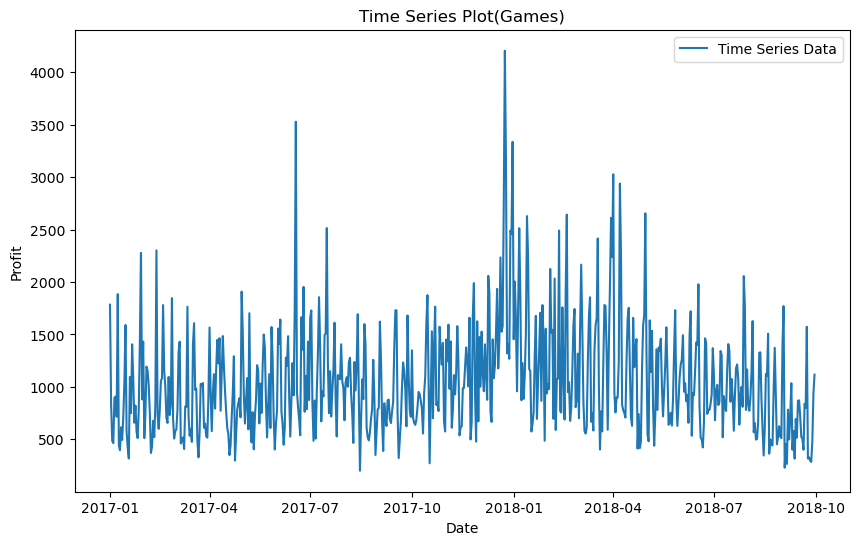

In [146]:
df_Games.set_index('Date', inplace=True)
plt.figure(figsize=(10, 6))
plt.plot(df_Games.index, df_Games['Profit'], label='Time Series Data')
plt.title('Time Series Plot(Games)')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.show()

In [147]:
df_Sports = df[df['Product_Category'] == 'Sports & Outdoors']
df_Sports

Date   Product_Category  Profit
3    2017-01-01  Sports & Outdoors  1146.0
8    2017-01-02  Sports & Outdoors   463.0
13   2017-01-03  Sports & Outdoors   512.0
18   2017-01-04  Sports & Outdoors  1226.0
23   2017-01-05  Sports & Outdoors   501.0
...         ...                ...     ...
3168 2018-09-26  Sports & Outdoors   165.0
3173 2018-09-27  Sports & Outdoors   732.0
3178 2018-09-28  Sports & Outdoors   806.0
3183 2018-09-29  Sports & Outdoors  1980.0
3188 2018-09-30  Sports & Outdoors  1993.0

[638 rows x 3 columns]

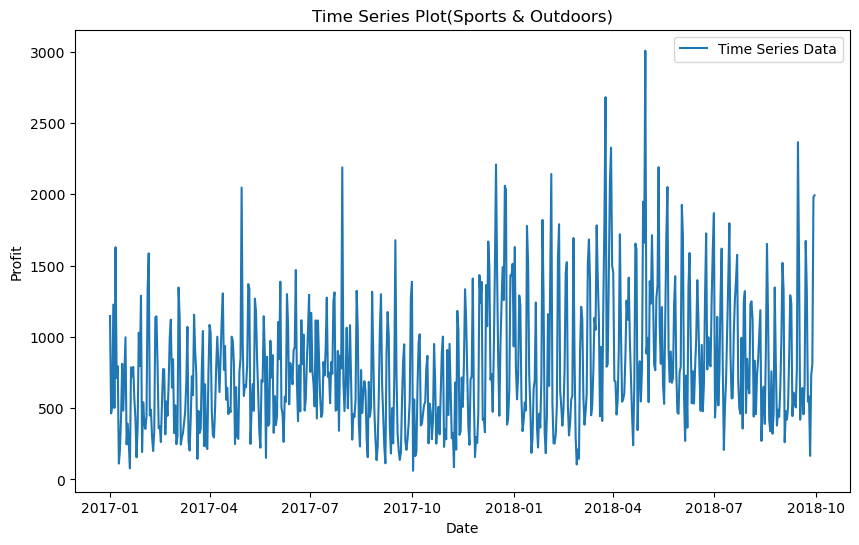

In [148]:
df_Sports.set_index('Date', inplace=True)
plt.figure(figsize=(10, 6))
plt.plot(df_Sports.index, df_Sports['Profit'], label='Time Series Data')
plt.title('Time Series Plot(Sports & Outdoors)')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.show()

In [149]:
df_Toys = df[df['Product_Category'] == 'Toys']
df_Toys

Date Product_Category  Profit
4    2017-01-01             Toys  1378.0
9    2017-01-02             Toys  1777.0
14   2017-01-03             Toys   723.0
19   2017-01-04             Toys   989.0
24   2017-01-05             Toys  1475.0
...         ...              ...     ...
3169 2018-09-26             Toys  1352.0
3174 2018-09-27             Toys  1159.0
3179 2018-09-28             Toys  1832.0
3184 2018-09-29             Toys  1722.0
3189 2018-09-30             Toys  2002.0

[638 rows x 3 columns]

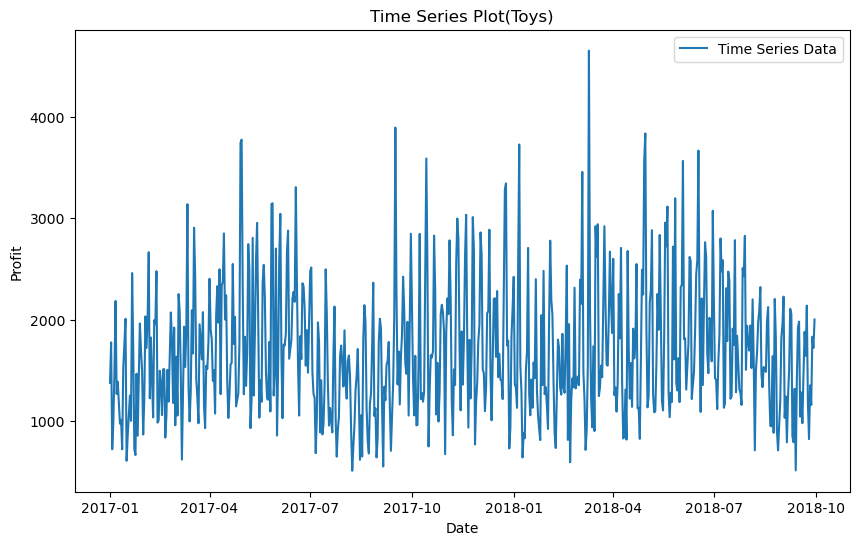

In [150]:
df_Toys.set_index('Date', inplace=True)
plt.figure(figsize=(10, 6))
plt.plot(df_Toys.index, df_Toys['Profit'], label='Time Series Data')
plt.title('Time Series Plot(Toys)')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.show()

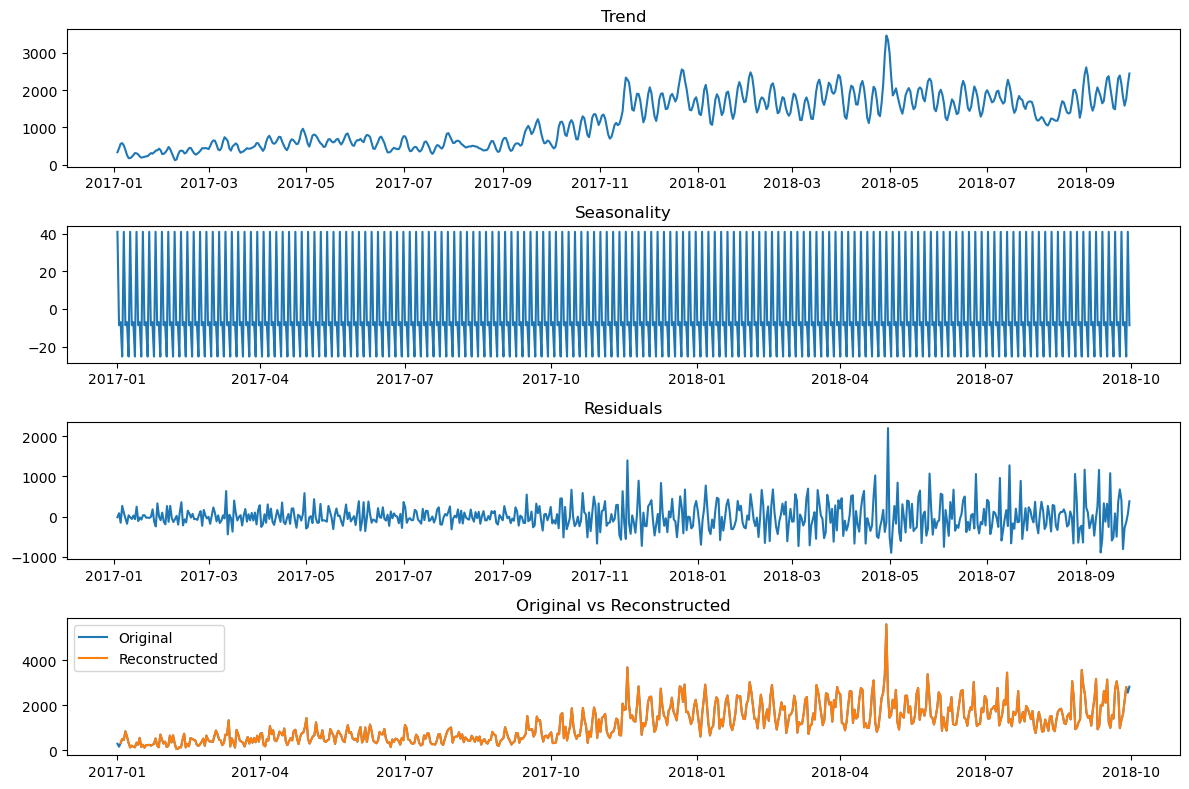

In [151]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose the time series into trend, seasonality, and residual
result = seasonal_decompose(df_Art['Profit'], model='additive', period=4)

# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality')

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residuals')

plt.subplot(4, 1, 4)
plt.plot(df_Art['Profit'], label='Original')
plt.plot(result.trend + result.seasonal + result.resid, label='Reconstructed')
plt.title('Original vs Reconstructed')
plt.legend()

plt.tight_layout()
plt.show()

In [152]:
# Fit an auto ARIMA model
model = auto_arima(df_Art['Profit'], seasonal=True, m=12, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.35 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=9877.314, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=9857.579, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=9755.562, Time=0.85 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=9875.347, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=9786.826, Time=0.26 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=9748.659, Time=1.25 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=9775.272, Time=0.57 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=9673.404, Time=2.82 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=9676.238, Time=2.12 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=4.36 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=9710.987, Time=3.25 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=9852.309, Time=0.78 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=9631.060, Time=3.73 sec
 ARIMA(1,1,1)(1,0,1)[12] inte

In [199]:
#split the dataset into train data and test data
train_size = int(len(df_Art) * 0.8)  # 80% for training, 20% for testing
train_Art, test_Art = df_Art[:train_size], df_Art[train_size:]

In [214]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


order = (2, 1, 1)  # Non-seasonal orders
seasonal_order = (2, 0, 2, 12)  # Seasonal orders

# Fit SARIMA model on the training data
sarima_model = SARIMAX(train_Art['Profit'], order=order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit()

C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ammra\AppData\Local\anaconda3\Lib\site-p

In [215]:
# Forecast future values on the test set
forecast_steps = len(test_Art)
forecast_results = sarima_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast_results.predicted_mean
forecast_values

2018-05-26    2319.907176
2018-05-27    2189.869810
2018-05-28    2004.535917
2018-05-29    1564.109649
2018-05-30    1437.494920
                 ...     
2018-09-26    1499.151213
2018-09-27    1631.870963
2018-09-28    2111.625620
2018-09-29    2341.994503
2018-09-30    2208.215739
Freq: D, Name: predicted_mean, Length: 128, dtype: float64

In [217]:
from sklearn.metrics import mean_squared_error

#calculate Mean Squared Error (MSE) as a measure of accuracy
mse = mean_squared_error(test_Art['Profit'], forecast_values)
print('Mean Squared Error:', mse)

#calculate Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_Art['Profit'], forecast_values)
print('Mean Absolute Error:', mae)

Mean Squared Error: 337400.08697856567
Mean Absolute Error: 482.0609246772718


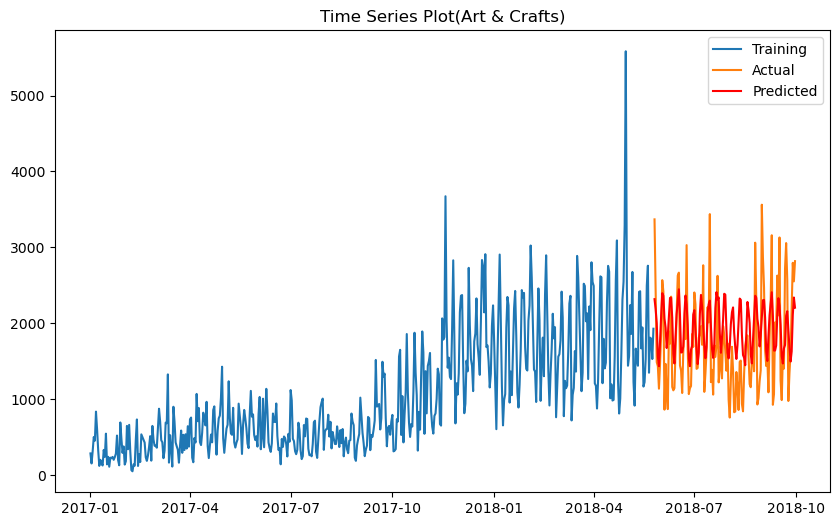

In [218]:
# Plot the original data, predicted values, and confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(train_Art.index, train_Art['Profit'], label='Training')
plt.plot(test_Art.index, test_Art['Profit'], label='Actual')
plt.plot(forecast_values.index, forecast_values, label='Predicted', color='red')
plt.title('Time Series Plot(Art & Crafts)')
plt.legend()
plt.show()

In [162]:
forecast_values.sum()

248951.98555570806

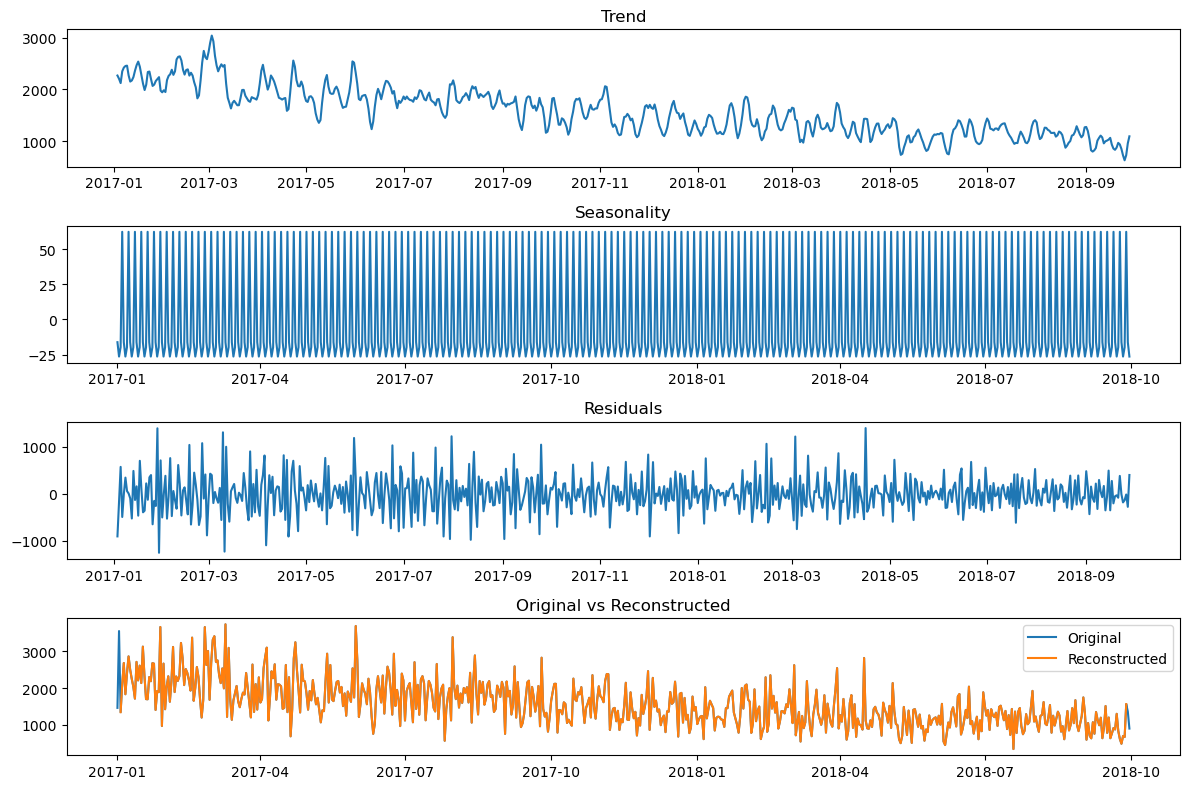

In [164]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose the time series into trend, seasonality, and residual
result = seasonal_decompose(df_Elec['Profit'], model='additive', period=4)

# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality')

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residuals')

plt.subplot(4, 1, 4)
plt.plot(df_Elec['Profit'], label='Original')
plt.plot(result.trend + result.seasonal + result.resid, label='Reconstructed')
plt.title('Original vs Reconstructed')
plt.legend()

plt.tight_layout()
plt.show()

In [165]:
# Fit an auto ARIMA model
model = auto_arima(df_Elec['Profit'], seasonal=True, m=12, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=9683.199, Time=2.89 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=10103.840, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=9921.415, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=10101.842, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=2.72 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=3.15 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=9686.012, Time=7.74 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=9687.829, Time=6.14 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=9684.142, Time=1.52 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=5.28 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=5.69 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=7.10 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=9680.837, Time=2.15 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=inf,

In [221]:
#split the dataset into train data and test data
train_size = int(len(df_Elec) * 0.8)  # 80% for training, 20% for testing
train_Elec, test_Elec = df_Elec[:train_size], df_Elec[train_size:]

In [222]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


order = (0, 1, 1)  # Non-seasonal orders
seasonal_order = (1, 0, 1, 12)  # Seasonal orders

# Fit SARIMA model on the training data
sarima_model = SARIMAX(train_Elec['Profit'], order=order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit()

C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [223]:
# Forecast future values on the test set
forecast_steps = len(test_Elec)
forecast_results = sarima_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast_results.predicted_mean
forecast_values

2018-05-26    1118.116070
2018-05-27    1111.093306
2018-05-28    1188.758706
2018-05-29    1061.799401
2018-05-30    1093.757670
                 ...     
2018-09-26    1106.806975
2018-09-27    1109.134358
2018-09-28    1108.974478
2018-09-29    1109.440176
2018-09-30    1108.347738
Freq: D, Name: predicted_mean, Length: 128, dtype: float64

In [225]:
from sklearn.metrics import mean_squared_error

#calculate Mean Squared Error (MSE) as a measure of accuracy
mse = mean_squared_error(test_Elec['Profit'], forecast_values)
print('Mean Squared Error:', mse)

#calculate Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_Elec['Profit'], forecast_values)
print('Mean Absolute Error:', mae)

Mean Squared Error: 106127.5992459032
Mean Absolute Error: 265.7768895117564


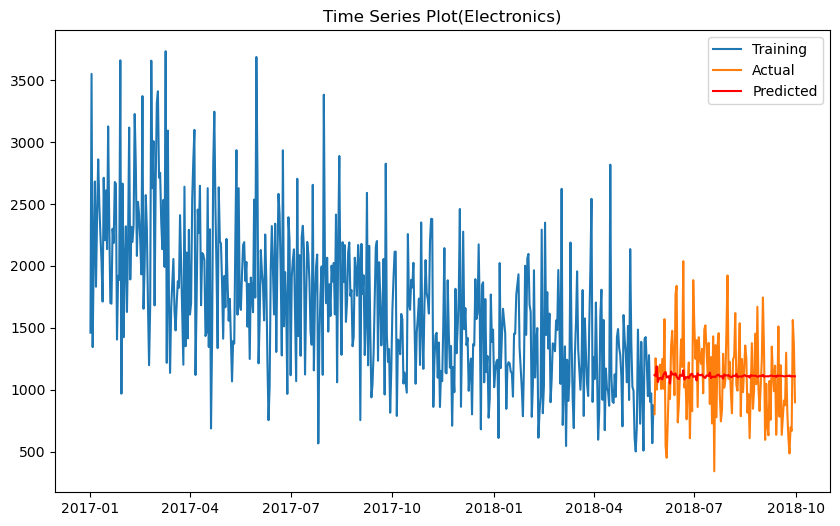

In [224]:
# Plot the original data, predicted values, and confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(train_Elec.index, train_Elec['Profit'], label='Training')
plt.plot(test_Elec.index, test_Elec['Profit'], label='Actual')
plt.plot(forecast_values.index, forecast_values, label='Predicted', color='red')
plt.title('Time Series Plot(Electronics)')
plt.legend()
plt.show()

In [226]:
forecast_values.sum()

142129.40340927063

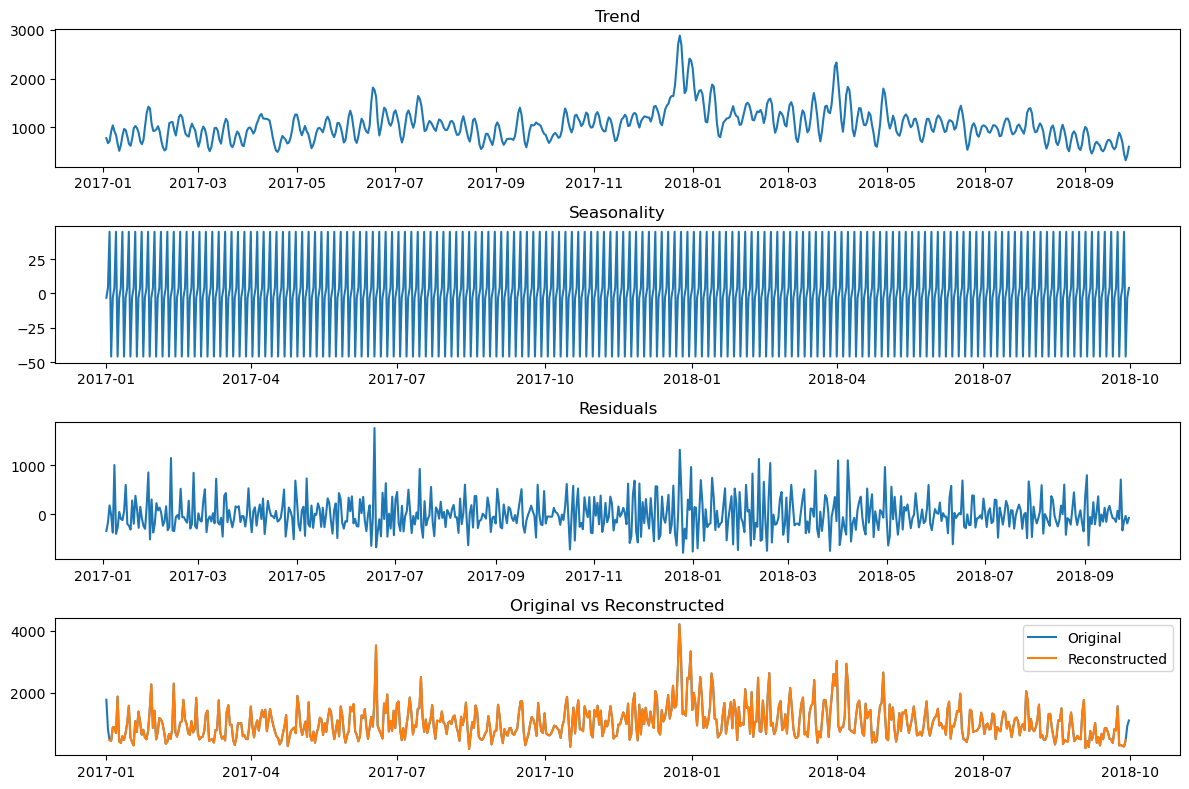

In [227]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose the time series into trend, seasonality, and residual
result = seasonal_decompose(df_Games['Profit'], model='additive', period=4)

# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality')

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residuals')

plt.subplot(4, 1, 4)
plt.plot(df_Games['Profit'], label='Original')
plt.plot(result.trend + result.seasonal + result.resid, label='Reconstructed')
plt.title('Original vs Reconstructed')
plt.legend()

plt.tight_layout()
plt.show()

In [228]:
# Fit an auto ARIMA model
model = auto_arima(df_Games['Profit'], seasonal=True, m=12, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=9602.426, Time=2.69 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=9887.732, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=9834.701, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=9684.883, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=9885.735, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=9597.994, Time=2.12 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=9610.534, Time=1.22 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=9598.265, Time=4.49 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=9600.493, Time=2.27 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=9601.923, Time=5.47 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=9632.747, Time=1.25 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=9625.917, Time=1.73 sec
 ARIMA(3,1,2)(0,0,1)[12] intercept   : AIC=9588.370, Time=2.43 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=9603.901, Time=1.40 sec
 ARIMA(3,1,2)(1,0,1

In [229]:
#split the dataset into train data and test data
train_size = int(len(df_Games) * 0.8)  # 80% for training, 20% for testing
train_Games, test_Games = df_Games[:train_size], df_Games[train_size:]

In [230]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


order = (4, 1, 3)  # Non-seasonal orders
seasonal_order = (1, 0, 0, 12)  # Seasonal orders

# Fit SARIMA model on the training data
sarima_model = SARIMAX(train_Games['Profit'], order=order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit()

C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [231]:
# Forecast future values on the test set
forecast_steps = len(test_Games)
forecast_results = sarima_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast_results.predicted_mean
forecast_values

2018-05-26    1367.409558
2018-05-27    1327.863232
2018-05-28     978.735706
2018-05-29     606.515196
2018-05-30     525.474915
                 ...     
2018-09-26     551.788610
2018-09-27     795.468873
2018-09-28    1182.845082
2018-09-29    1422.047357
2018-09-30    1333.020855
Freq: D, Name: predicted_mean, Length: 128, dtype: float64

In [232]:
from sklearn.metrics import mean_squared_error

#calculate Mean Squared Error (MSE) as a measure of accuracy
mse = mean_squared_error(test_Games['Profit'], forecast_values)
print('Mean Squared Error:', mse)

#calculate Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_Games['Profit'], forecast_values)
print('Mean Absolute Error:', mae)

Mean Squared Error: 109694.62360296107
Mean Absolute Error: 266.57262605529513


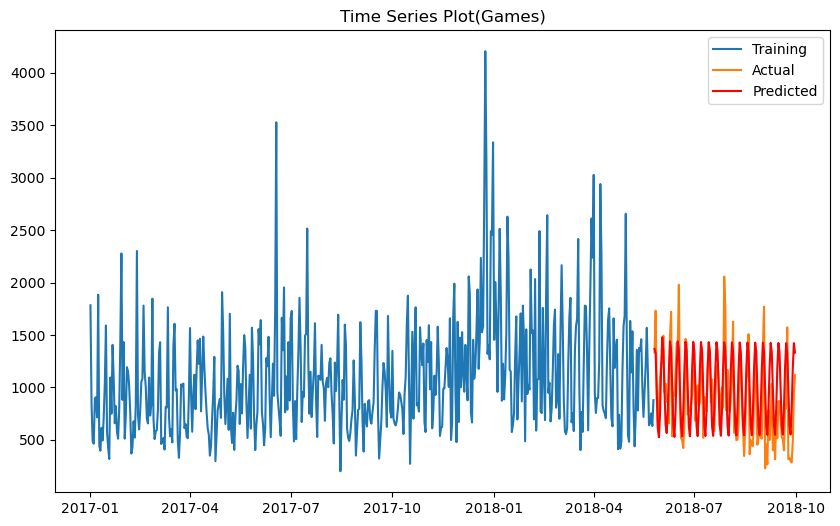

In [233]:
# Plot the original data, predicted values, and confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(train_Games.index, train_Games['Profit'], label='Training')
plt.plot(test_Games.index, test_Games['Profit'], label='Actual')
plt.plot(forecast_values.index, forecast_values, label='Predicted', color='red')
plt.title('Time Series Plot(Games)')
plt.legend()
plt.show()

In [234]:
forecast_values.sum()

127012.69056482459

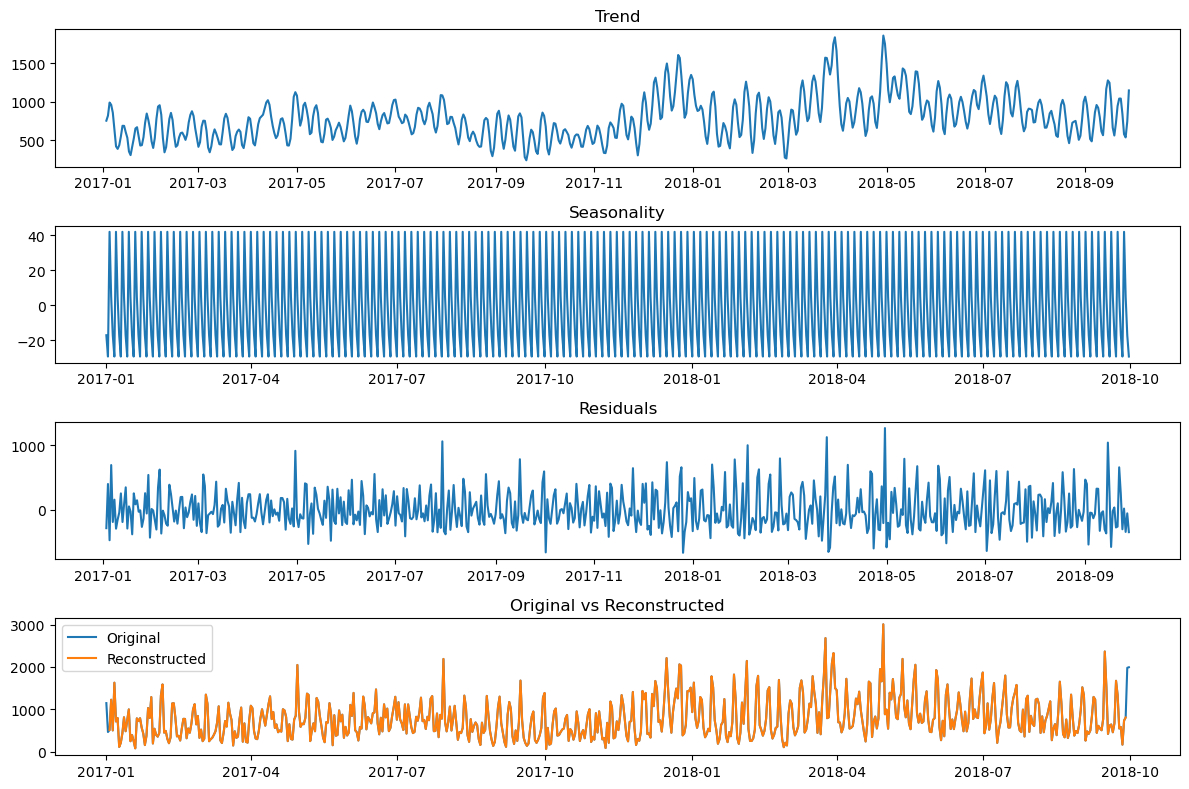

In [235]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose the time series into trend, seasonality, and residual
result = seasonal_decompose(df_Sports['Profit'], model='additive', period=4)

# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality')

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residuals')

plt.subplot(4, 1, 4)
plt.plot(df_Sports['Profit'], label='Original')
plt.plot(result.trend + result.seasonal + result.resid, label='Reconstructed')
plt.title('Original vs Reconstructed')
plt.legend()

plt.tight_layout()
plt.show()

In [236]:
# Fit an auto ARIMA model
model = auto_arima(df_Sports['Profit'], seasonal=True, m=12, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=9400.519, Time=2.65 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=9731.014, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=9695.251, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=9543.887, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=9729.020, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=9399.409, Time=2.24 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=9413.199, Time=1.32 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=9386.454, Time=5.13 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=9395.930, Time=5.58 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=9451.963, Time=3.33 sec
 ARIMA(2,1,1)(0,0,2)[12] intercept   : AIC=9436.428, Time=3.68 sec
 ARIMA(3,1,2)(0,0,2)[12] intercept   : AIC=9371.637, Time=4.72 sec
 ARIMA(3,1,2)(0,0,1)[12] intercept   : AIC=9372.846, Time=2.23 sec
 ARIMA(3,1,2)(1,0,2)[12] intercept   : AIC=9377.663, Time=5.69 sec
 ARIMA(3,1,2)(1,0,1

In [237]:
#split the dataset into train data and test data
train_size = int(len(df_Sports) * 0.8)  # 80% for training, 20% for testing
train_Sports, test_Sports = df_Sports[:train_size], df_Sports[train_size:]

In [238]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


order = (4, 1, 5)  # Non-seasonal orders
seasonal_order = (1, 0, 0, 12)  # Seasonal orders

# Fit SARIMA model on the training data
sarima_model = SARIMAX(train_Sports['Profit'], order=order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit()

C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [239]:
# Forecast future values on the test set
forecast_steps = len(test_Sports)
forecast_results = sarima_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast_results.predicted_mean
forecast_values

2018-05-26    1519.355098
2018-05-27    1500.658051
2018-05-28    1143.671542
2018-05-29     850.582747
2018-05-30     648.966372
                 ...     
2018-09-26     716.471025
2018-09-27     816.929094
2018-09-28    1119.306083
2018-09-29    1396.111174
2018-09-30    1439.808195
Freq: D, Name: predicted_mean, Length: 128, dtype: float64

In [240]:
from sklearn.metrics import mean_squared_error

#calculate Mean Squared Error (MSE) as a measure of accuracy
mse = mean_squared_error(test_Sports['Profit'], forecast_values)
print('Mean Squared Error:', mse)

#calculate Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_Sports['Profit'], forecast_values)
print('Mean Absolute Error:', mae)

Mean Squared Error: 150129.2668559257
Mean Absolute Error: 313.6461369900977


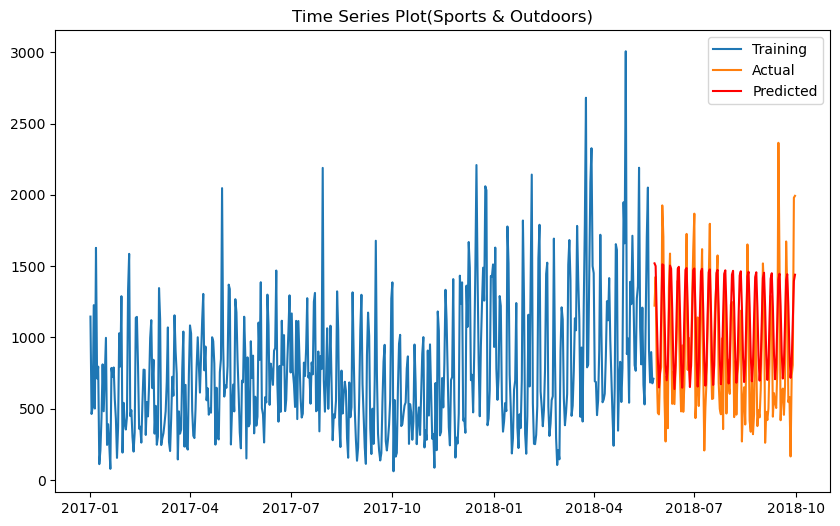

In [241]:
# Plot the original data, predicted values, and confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(train_Sports.index, train_Sports['Profit'], label='Training')
plt.plot(test_Sports.index, test_Sports['Profit'], label='Actual')
plt.plot(forecast_values.index, forecast_values, label='Predicted', color='red')
plt.title('Time Series Plot(Sports & Outdoors)')
plt.legend()
plt.show()

In [242]:
forecast_values.sum()

139814.08080390212

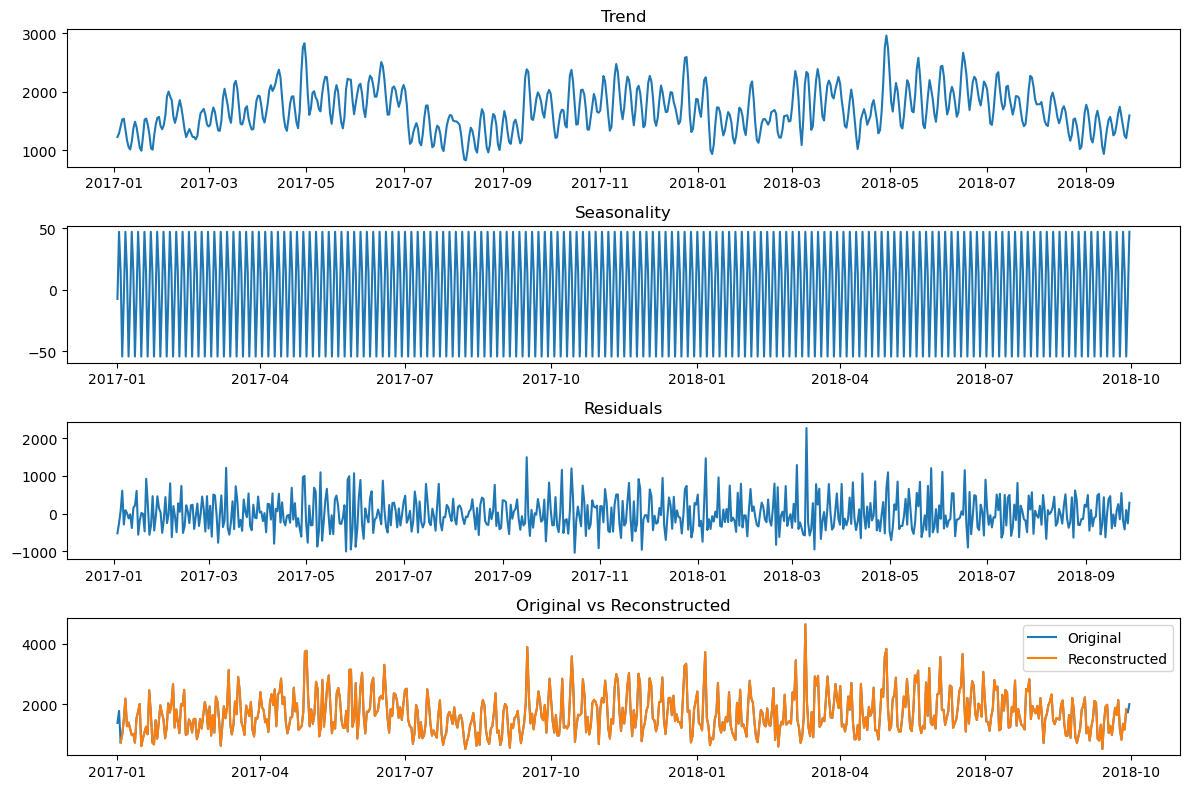

In [243]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose the time series into trend, seasonality, and residual
result = seasonal_decompose(df_Toys['Profit'], model='additive', period=4)

# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality')

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residuals')

plt.subplot(4, 1, 4)
plt.plot(df_Toys['Profit'], label='Original')
plt.plot(result.trend + result.seasonal + result.resid, label='Reconstructed')
plt.title('Original vs Reconstructed')
plt.legend()

plt.tight_layout()
plt.show()

In [244]:
# Fit an auto ARIMA model
model = auto_arima(df_Toys['Profit'], seasonal=True, m=12, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=9992.963, Time=2.43 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=10089.276, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=10004.000, Time=0.55 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=10001.808, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=11387.087, Time=0.03 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=inf, Time=2.43 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=9855.650, Time=2.56 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=inf, Time=1.15 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=9909.883, Time=5.69 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=9992.408, Time=5.42 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=9999.278, Time=0.83 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=9998.018, Time=1.23 sec
 ARIMA(3,0,2)(1,0,0)[12] intercept   : AIC=9992.916, Time=2.58 sec
 ARIMA(2,0,3)(1,0,0)[12] intercept   : AIC=9914.038, Time=2.34 sec
 ARIMA(1,0,1)(1,0,0)[12] 

In [245]:
#split the dataset into train data and test data
train_size = int(len(df_Toys) * 0.8)  # 80% for training, 20% for testing
train_Toys, test_Toys = df_Toys[:train_size], df_Toys[train_size:]

In [246]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


order = (3, 0, 3)  # Non-seasonal orders
seasonal_order = (1, 0, 0, 12)  # Seasonal orders

# Fit SARIMA model on the training data
sarima_model = SARIMAX(train_Toys['Profit'], order=order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit()

C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ammra\AppData\Local\anaconda3\Lib\site-p

In [247]:
# Forecast future values on the test set
forecast_steps = len(test_Toys)
forecast_results = sarima_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast_results.predicted_mean
forecast_values

2018-05-26    2405.473461
2018-05-27    2106.065992
2018-05-28    1681.174365
2018-05-29    1532.028653
2018-05-30    1856.487008
                 ...     
2018-09-26     440.099395
2018-09-27     770.132355
2018-09-28     881.281337
2018-09-29    1283.725204
2018-09-30     813.000463
Freq: D, Name: predicted_mean, Length: 128, dtype: float64

In [248]:
from sklearn.metrics import mean_squared_error

#calculate Mean Squared Error (MSE) as a measure of accuracy
mse = mean_squared_error(test_Toys['Profit'], forecast_values)
print('Mean Squared Error:', mse)

#calculate Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_Toys['Profit'], forecast_values)
print('Mean Absolute Error:', mae)

Mean Squared Error: 537713.454312314
Mean Absolute Error: 598.7887761453096


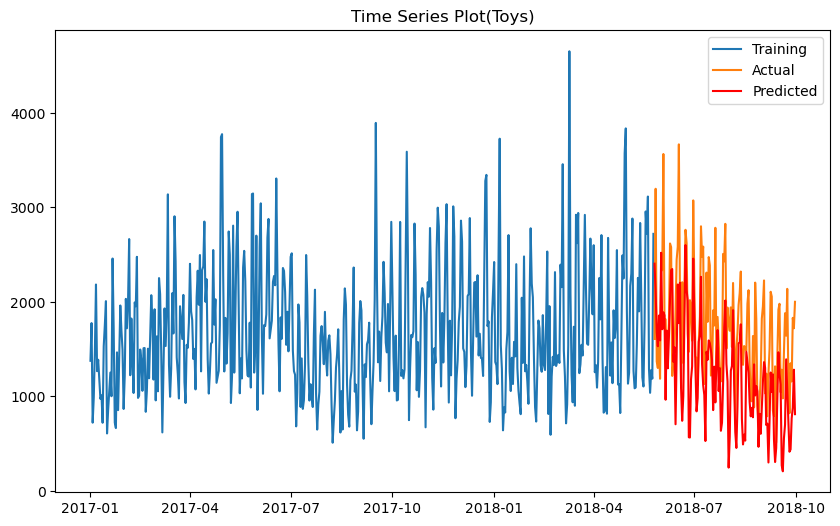

In [249]:
# Plot the original data, predicted values, and confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(train_Toys.index, train_Toys['Profit'], label='Training')
plt.plot(test_Toys.index, test_Toys['Profit'], label='Actual')
plt.plot(forecast_values.index, forecast_values, label='Predicted', color='red')
plt.title('Time Series Plot(Toys)')
plt.legend()
plt.show()

In [250]:
forecast_values.sum()

156852.33729023533